In [5]:
# SIMPLE LINEAR REGRESSION
# STEP:1) IMPORTING NECESSARY LIBRARIES:
import numpy as np                                     #for number operations
import matplotlib.pyplot as plt                        #for visualization of data
import seaborn as sns                                  #for visualization of data
import pandas as pd                                    #for creating a dataframe
from sklearn.model_selection import train_test_split   #for splitting train and test data
from sklearn.linear_model import LinearRegression      #for Linear regression Algorithmn
import statsmodels.api as sm                           #for conducting stats operations(OLS model)
from yellowbrick.regressor import ResidualsPlot        #for visualisation of error-terms


In [4]:
pip install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
# STEP:2) IMPORTING THE DATASET:
companies_df=pd.read_csv(r"E:\Data_Analysis_PythonFiles\1000_Companies.csv")
companies_df.head(10)
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [75]:
# STEP:3) ANALYSIS AND PRE PREOCESSING:
# Step:1:Check if string data present in the dataset: Here, in this data set, str data present in the form of categorical in nature.
# Since the str categorical in nature, we can convert that to number format
companies_df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [76]:
companies_df['State']=companies_df['State'].astype('category')
companies_df.dtypes

R&D Spend           float64
Administration      float64
Marketing Spend     float64
State              category
Profit              float64
dtype: object

In [77]:
companies_df['State']=companies_df['State'].cat.codes
companies_df.dtypes
companies_df.head(10)            #in the code, I have converted the str data to number data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [78]:
#Now first anamoly averted, now look for other anamoly like missing value, duplicates etc.
companies_df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [79]:
#Second anamoly as missing value averted since no missing value present in the dataset
companies_df.drop_duplicates()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,2,192261.83000
1,162597.70,151377.590,443898.5300,0,191792.06000
2,153441.51,101145.550,407934.5400,1,191050.39000
3,144372.41,118671.850,383199.6200,2,182901.99000
4,142107.34,91391.770,366168.4200,1,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,0,95279.96251
996,134970.00,130390.080,329204.0228,0,164336.60550
997,100275.47,241926.310,227142.8200,0,413956.48000
998,128456.23,321652.140,281692.3200,0,333962.19000


In [80]:
#Since the 1000 rows are intact, means that there is no duplicates. From this we can go ahead with next step.
# STEP:4)ASSUMPTIONS AND ERROR TERMS(INCLUDING SPLITTING Independent AND Dependent Variable)
companies_df1=companies_df
companies_df1.head(10)  #for backup purpose, I have saved the dataframe to another variable.

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [81]:
#Step:1:Splitting Independent Variable and Dependent Variable
X=companies_df1.iloc[0:-1,0:1].values
Y=companies_df1.iloc[0:-1,4].values  #Now the data split into required IV and DV. IV-Independent Variable, DV=Dependent Variable

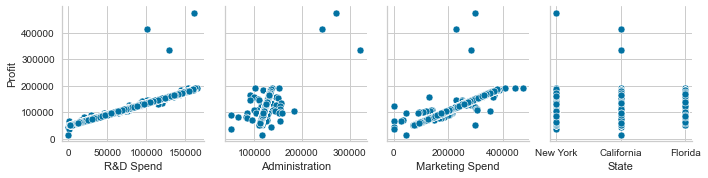

In [47]:
#ASSUMPTIONS:
# 1.Linear Relationship betweem IV and DV: It can be done  by using Pairplot method (scatterplot)
sns.pairplot(companies_df1,x_vars=['R&D Spend','Administration','Marketing Spend','State'],y_vars=['Profit'])

In [69]:
#Here, the number data are having a "+" linear relation, the graphs are from left bottom to right top indicates + relation. So, the Linear Relationship assumption satisfied.
# 2. Multicollinearity method (Relationship between IV): It can be checked using the corrleation method. Here i have neglected DV since checking relation for IV only.
companies_df1.iloc[:,:-2].corr()  #Here, corr method used for checking correlation

,R&D Spend,Administration,Marketing Spend
R&D Spend,1.000000,0.582434,0.978407
Administration,0.582434,1.000000,0.520465
Marketing Spend,0.978407,0.520465,1.000000


In [70]:
#From above Df, we can see that R&D and Marketing Spend having correlation value of 0.97, which is higher that 0.75, in this case, droping one column (Marketing Spend)
companies_df1.drop("Marketing Spend", inplace=True, axis=1)


In [71]:
companies_df1.head(10)

,R&D Spend,Administration,State,Profit
0,165349.20,136897.80,2,192261.83
1,162597.70,151377.59,0,191792.06
2,153441.51,101145.55,1,191050.39
3,144372.41,118671.85,2,182901.99
4,142107.34,91391.77,1,166187.94
5,131876.90,99814.71,2,156991.12
6,134615.46,147198.87,0,156122.51
7,130298.13,145530.06,1,155752.60
8,120542.52,148718.95,2,152211.77
9,123334.88,108679.17,0,149759.96


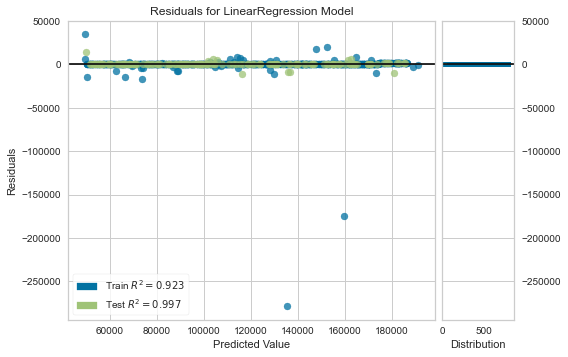

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [82]:
# ERROR TERMS:
#3.Homoscedaticity Assumptions:(Here the Datapoints should not have any pattern in the graph)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15, random_state=50)  #Here the train data is 85% and test data is 15%
model=LinearRegression()
visualizer=ResidualsPlot(model)
visualizer.fit(X_train,Y_train) #fit the train data 
visualizer.score(X_test,Y_test) #To get the error score
visualizer.poof()               #To get the graph

<function matplotlib.pyplot.show(close=None, block=None)>

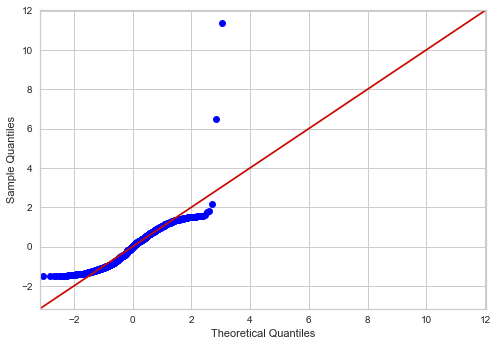

In [89]:
#From above Graph there is no pattern with the datapoints, so Homoscedaticity is satisfied.
# 4.Normal Distribution: (Datapoints in the graph should be closed packed along the 45 degree line):
# Step:1 Calling the model:
LinearRegression=sm.OLS(Y_train,X_train).fit() #Here ordinary least square model used for getting the distance the between datapoints to the line.  #fitting the data
error_score=LinearRegression.resid #to get the error score
sm.qqplot(error_score,fit=True,line='45') #quartile quartile plot
plt.show

In [90]:
#Here Datapoints packed together along the line, the 2 points may consider neglible in 1000 rows of datapoints
# Step:5: Auto-corrleations:(The value can be checked using the "Durbin-Watson method")
LinearRegression=sm.OLS(Y_train,X_train).fit()
LinearRegression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                          1.889e+04
Date:                Wed, 01 Dec 2021   Prob (F-statistic):                        0.00
Time:                        19:50:16   Log-Likelihood:                         -9850.4
No. Observations:                 849   AIC:                                  1.970e+04
Df Residuals:                     848   BIC:                                  1.971e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3101      0.010    137.455      0.000       1.291       1.329
==============================================================================
Omnibus:                      490.281   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14818.066
Skew:                           2.058   Prob(JB):                         0.00
Kurtosis:                      23.049   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
#Here Durbin-Watson value is 1.606 near to 2, it should be range between 0-4, hence Auto-corrleation satisfied. Here all the assumptions are satisfied.
# STEP:5) SPLITTING TEST AND TRAIN DATA FOR THE MODEL:
from sklearn.linear_model import LinearRegression
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15, random_state=50)
model=LinearRegression()
model.fit(X_train, Y_train)
Y_target=model.predict(X_test)

In [94]:
#Now we check for accuracy score for the model that was trained
from sklearn.metrics import r2_score
r2_score(Y_test,Y_target)

0.9968542671976769

In [ ]:
#From the above score, it can be seen that model will able to predict the new target with new data with the accuracy of 99.68%. 